# Star Analysis
### Milestone 1
#### Cloe Kwiatkowski

## The Hertzsprung-Russell (HR) diagram
# !['Hertz-Russ diagram'](hrdiagram_01.jpg)

More information on Star lifecycles and the HR diagram:

https://www.wwu.edu/astro101/a101_hrdiagram.shtml

https://chandra.harvard.edu/edu/formal/stellar_ev/story/index3.html

http://hyperphysics.phy-astr.gsu.edu/hbase/Starlog/staspe.html

https://lco.global/spacebook/stars/h-r-diagram/

https://universe.nasa.gov/stars/types/

---
### Objective: 
    You have been tasked with determining which stars are most likely to have nearby planets that could possibly support life.

#### Overview
You have been hired by a space research company named AWAY (Aliens Where Are You). One of their biggest projects has been to compile a list of yellow-dwarf stars. Yellow-dwarf stars are important because that is the type of star our sun is. AWAY scientists have theorized that other yellow-dwarf stars may be able to support life the way our sun supports life on earth. AWAY looks for planets around these stars in the search for alien lifeforms.

#### About the Dataset
- Temperature: The average temperature of the star (K)
- L: "Luminosity" or brightness of the star (Watts)
- R: "Radius" or distance from the center of the star to its outer edge (solar radius)
- A_M: "Absolute magnitude" or the magnitude of the star when measured from a distance of 10 parsecs (1 parsec = 3.26 lightyears)
- Spectral_Class: The group that a star belongs to depending on its spectrum and luminosity
- Color: color of the star
- Type: type of star

In [2131]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### The Sun (Main Sequence)
    Temperature: 5772 K
    Luminosity: 3.75E+28
    Radius: 4.33E+05
    Absolute Magnitude: +4.83
    Spectral Class: G
    Color: Yellow

In [2132]:
sun = {
    'Temperature': 5772,
    'L': (3.75e28),
    'R': (4.33e5),
    'A_M': 4.83,
    'Spectral_Class': 'G',
    'Color': 'Yellow'
}
sun

{'Temperature': 5772,
 'L': 3.75e+28,
 'R': 433000.0,
 'A_M': 4.83,
 'Spectral_Class': 'G',
 'Color': 'Yellow'}

In [2133]:
# color classifications
color_class = {
    'Spectral Class': ['O', 'B', 'A', 'F', 'G', 'K', 'M'], 
    'Intrinsic Color': ['Blue', 'Blue-White', 'White', 'Yellow-White', 'Yellow', 'Orange', 'Red'],
    'Tempurature (K)': ['>= 30,000', '10,000 - 30,000', '7,500 - 10,000', '6,000 - 7,500', '5,200 - 6,000', '3,700 - 5,200', '2,400 - 3,700']
}
color_class = pd.DataFrame.from_dict(color_class)
color_class

,Spectral Class,Intrinsic Color,Tempurature (K)
0,O,Blue,">= 30,000"
1,B,Blue-White,"10,000 - 30,000"
2,A,White,"7,500 - 10,000"
3,F,Yellow-White,"6,000 - 7,500"
4,G,Yellow,"5,200 - 6,000"
5,K,Orange,"3,700 - 5,200"
6,M,Red,"2,400 - 3,700"


In [2134]:
# type classifications
types = {
    'Type Number': [0, 1, 2, 3, 4, 5],
    'Types': ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiants', 'Hypergiants']
}
types = pd.DataFrame.from_dict(types)
types

,Type Number,Types
0,0,Red Dwarf
1,1,Brown Dwarf
2,2,White Dwarf
3,3,Main Sequence
4,4,Supergiants
5,5,Hypergiants


In [2135]:
# mapping spectral class to colors for plot legend/scatter plots
class_colors = {
    'O': 'purple',
    'B': 'blue',
    'A': 'turquoise',
    'F': 'green',
    'G': 'yellow',
    'K': 'orange',
    'M': 'red'
}
class_colors

{'O': 'purple',
 'B': 'blue',
 'A': 'turquoise',
 'F': 'green',
 'G': 'yellow',
 'K': 'orange',
 'M': 'red'}

In [2136]:
# specifying title font & sizes for plots
font1 = {'color':'blue', 'size':30}  # supertitle
font2 = {'color':'darkred', 'size':10}  # title

### Importing the Star CSV File

In [2137]:
# importing stars data
stars = pd.read_csv('stars_data_.csv')
stars.drop_duplicates()  # removing duplicate values 
stars.head(10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
5,2840,0.000650,0.1100,16.98,Red,M,0
6,2637,0.000730,0.1270,17.22,Red,M,0
7,2600,0.000400,0.0960,17.40,Red,M,0
8,2650,0.000690,0.1100,17.45,Red,M,0
9,2700,0.000180,0.1300,16.05,Red,M,0


#### Data Cleaning

In [2138]:
# finding typos and/or inconsistent format
stars['Color'].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64

In [2139]:
# creating consistent format
# 'Colors': ['Blue', 'Blue-White', 'White', 'Yellow-White', 'Yellow', 'Orange', 'Red']
stars['Color'] = stars['Color'].replace(['Blue-white', 'Blue White', 'Blue white'], 'Blue-White')
stars['Color'] = stars['Color'].replace(['white', 'Whitish'], 'White')
stars['Color'] = stars['Color'].replace(['yellow-white', 'Yellowish White', 'White-Yellow'], 'Yellow-White')
stars['Color'] = stars['Color'].replace(['yellowish', 'Yellowish'], 'Yellow')
stars['Color'] = stars['Color'].replace('Pale yellow orange', 'Yellow-Orange')

# verifying change
stars['Color'].value_counts()

Red              112
Blue              56
Blue-White        41
White             12
Yellow-White      12
Yellow             3
Orange             2
Yellow-Orange      1
Orange-Red         1
Name: Color, dtype: int64

In [2140]:
# checking for null values
stars.isna().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

#### Stars Statistics

In [2141]:
# getting descriptive statistics
stars.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [2142]:
# retrieving top 5 hottest stars
stars.nlargest(5, ['Temperature'])

,Temperature,L,R,A_M,Color,Spectral_Class,Type
101,40000,813000.0,14.0,-6.23,Blue,O,4
30,39000,204000.0,10.6,-4.70,Blue,O,3
235,38940,374830.0,1356.0,-9.93,Blue,O,5
231,38234,272830.0,1356.0,-9.29,Blue,O,5
239,37882,294903.0,1783.0,-7.80,Blue,O,5


#### Creating a new 'Stars' DataFrame with columns that the 'Sun' DataFrame has

In [2143]:
# new df containing columns that sun df has
stars_sun = pd.DataFrame(stars, columns=['Temperature', 'L', 'R', 'A_M', 'Spectral_Class', 'Color'])
stars_sun

,Temperature,L,R,A_M,Spectral_Class,Color
0,3068,0.002400,0.1700,16.12,M,Red
1,3042,0.000500,0.1542,16.60,M,Red
2,2600,0.000300,0.1020,18.70,M,Red
3,2800,0.000200,0.1600,16.65,M,Red
4,1939,0.000138,0.1030,20.06,M,Red
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,O,Blue
236,30839,834042.000000,1194.0000,-10.63,O,Blue
237,8829,537493.000000,1423.0000,-10.73,A,White
238,9235,404940.000000,1112.0000,-11.23,A,White


### Spectral Class Histogram

In [2144]:
# variable to hold class counts
count_O = 0
count_B = 0
count_A = 0
count_F = 0
count_G = 0
count_K = 0
count_M = 0

# looping through class column and getting counts
for c in stars_sun['Spectral_Class']:
    if c == 'O':
        count_O += 1
    elif c == 'B':
        count_B += 1
    elif c == 'A':
        count_A += 1
    elif c == 'F':
        count_F += 1
    elif c == 'G':
        count_G += 1
    elif c == 'K':
        count_K += 1
    elif c == 'M':
        count_M += 1
    else:
        print('Error:', c)

# spectral class order
class_order = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

# spectral class color on plot
class_color = ['purple', 'blue', 'turquoise', 'green', 'yellow', 'orange', 'red']

# class counts
class_count = [count_O, count_B, count_A, count_F, count_G, count_K, count_M]

# dictionary mapping class to counts
sp_count = dict(zip(class_order, class_count))
sp_count

{'O': 40, 'B': 46, 'A': 19, 'F': 17, 'G': 1, 'K': 6, 'M': 111}

Text(0.5, 0.98, 'Categorical Spectral Class Plotting')

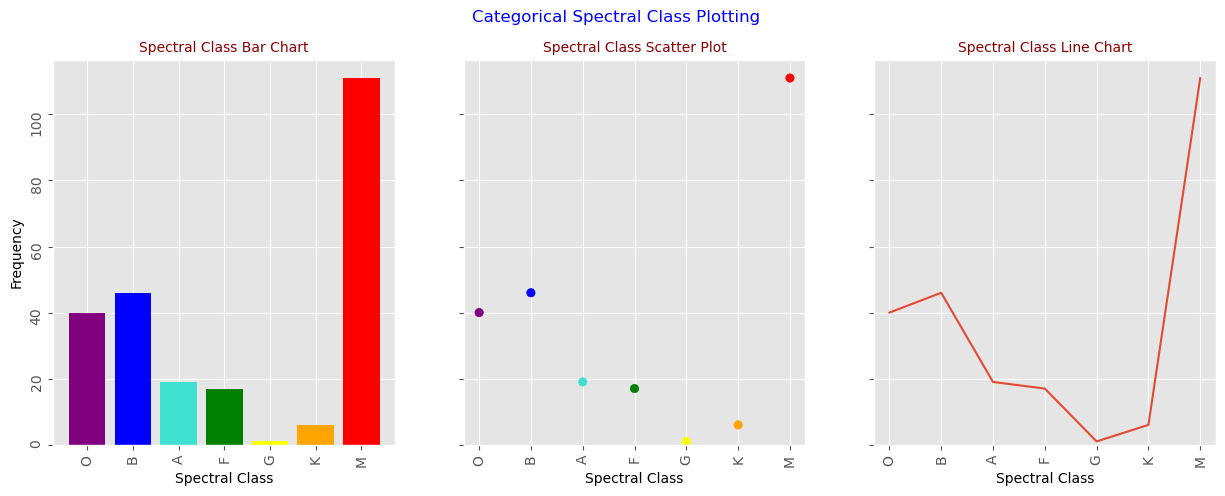

In [2145]:
# specifying 3 plots
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# plot 1
ax[0].bar(class_order, class_count, color=['purple', 'blue', 'turquoise', 'green', 'yellow', 'orange', 'red'])
ax[0].tick_params(labelrotation=90)
ax[0].set_title('Spectral Class Bar Chart', fontdict=font2)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Spectral Class')

# plot 2
ax[1].scatter(class_order, class_count, color=['purple', 'blue', 'turquoise', 'green', 'yellow', 'orange', 'red'])
ax[1].tick_params(labelrotation=90)
ax[1].set_title('Spectral Class Scatter Plot', fontdict=font2)
ax[1].set_xlabel('Spectral Class')

# plot 3
ax[2].plot(class_order, class_count)
ax[2].tick_params(labelrotation=90)
ax[2].set_title('Spectral Class Line Chart', fontdict=font2)
ax[2].set_xlabel('Spectral Class')

fig.suptitle('Categorical Spectral Class Plotting', fontdict=font1)

    Interpretation: 

    The most common spectral class is the M class. This accurately represents the majority of stars in the sky class type and makes up a large part of the main sequence on the HR diagram.

### Plotting Color Categorical Variables

Text(0.5, 0.98, 'Categorical Color Plotting')

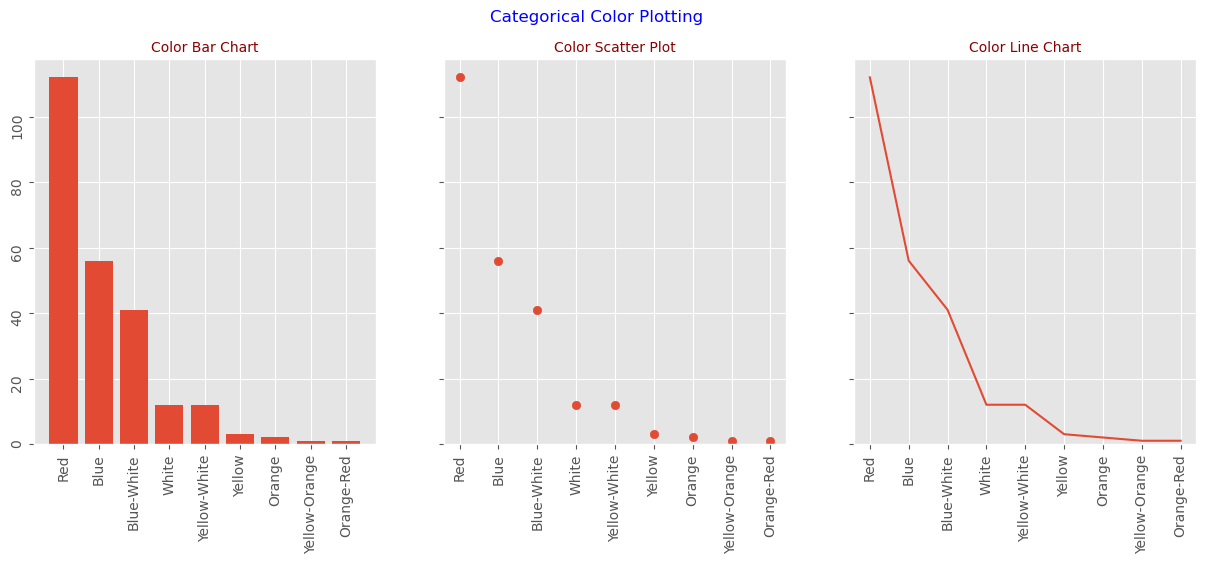

In [2146]:
# specifying 3 plots
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# plot 1
ax[0].bar(color_categories, color_counts)
ax[0].tick_params(labelrotation=90)
ax[0].set_title('Color Bar Chart', fontdict=font2)

# plot 2
ax[1].scatter(color_categories, color_counts)
ax[1].tick_params(labelrotation=90)
ax[1].set_title('Color Scatter Plot', fontdict=font2)

# plot 3
ax[2].plot(color_categories, color_counts)
ax[2].tick_params(labelrotation=90)
ax[2].set_title('Color Line Chart', fontdict=font2)


fig.suptitle('Categorical Color Plotting', fontdict=font1)

    Interpretation:

    The most common color of stars is red, which is the color of most M spectral class stars. This is consistent with the M class being the most common spectral class.

### Plotting Stacked Spectral Class Histogram (where bars are divided into star color)

[Text(0.5, 1.0, 'Spectral Class Stacked Bar Chart By Star Color')]

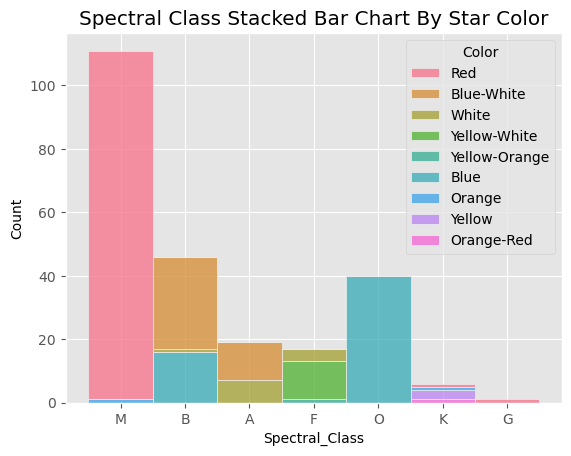

In [2147]:
# importing seaborn for plotting
import seaborn as sns

sns.histplot(binwidth=0.5, x='Spectral_Class', hue='Color', data=stars_sun, stat="count", multiple="stack", color=cmap).set(title='Spectral Class Stacked Bar Chart By Star Color')


#### Temperature Histogram

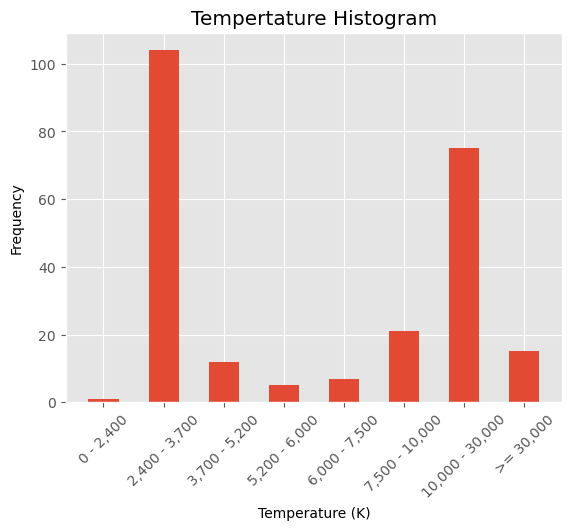

In [2148]:
# variables to hold temp count values
atemp_count = 0
btemp_count = 0
ctemp_count = 0
dtemp_count = 0
etemp_count = 0
ftemp_count = 0
gtemp_count = 0
htemp_count = 0

# temperature list counts
for temp in stars_sun['Temperature']:
    if temp <= 2400.0:
        atemp_count += 1
    elif (temp > 2400.0) & (temp <= 3700.0):
        btemp_count += 1
    elif (temp > 3700.0) & (temp <= 5200.0):
        ctemp_count += 1
    elif (temp > 5200.0) & (temp <= 6000.0):
        dtemp_count += 1
    elif (temp > 6000.0) & (temp <= 7500.0):
        etemp_count += 1
    elif (temp > 7500.0) & (temp <= 10000.0):
        ftemp_count += 1
    elif (temp > 10000.0) & (temp < 30000.0):
        gtemp_count += 1
    elif (temp >= 30000.0):
        htemp_count += 1
    else:
        print('Error:', temp)

# bar labels
temp_labels = ['0 - 2,400', '2,400 - 3,700', '3,700 - 5,200', '5,200 - 6,000', '6,000 - 7,500', '7,500 - 10,000', '10,000 - 30,000', '>= 30,000']

# bar counts
temp_counts = [atemp_count, btemp_count, ctemp_count, dtemp_count, etemp_count, ftemp_count, gtemp_count, htemp_count]

# temperature dictionary for temp group and temp count in group
temps = dict(zip(temp_labels, temp_counts))

# plotting temperature histogram
plt.bar(temp_labels, temp_counts, width=0.5)
plt.xlabel('Temperature (K)')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Tempertature Histogram')
plt.show()

    Interpretation:

    The most common temperature in the stars dataset is between ranges 2,400 - 3,700K. This is also the temperature of most M class stars.

#### Temperature Boxplot

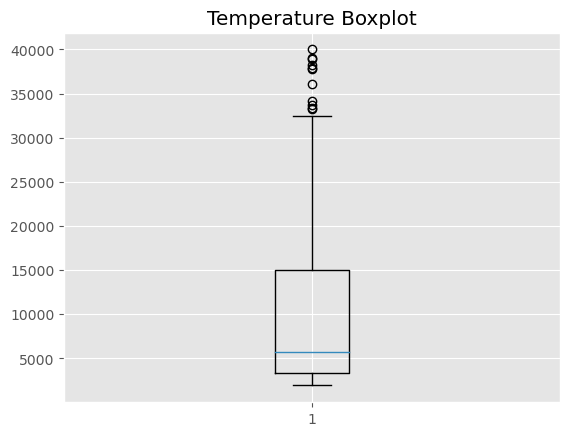

In [2149]:
# plotting temperature boxplot
fig = plt.figure()
plt.boxplot(stars_sun['Temperature'])
plt.title('Temperature Boxplot')
plt.show()

    Interpretation:

    The boxplot shows a median at around 6,000K with an upper and lower quartile range of 3,500 - 15,000K range. This represents ~50% of the star temperature in the stars dataset. ~25% of the stars are in a range of 2,000 - 3,500K. The upper quartile to upper whisker represents ~25% of the stars data in a much larger range of 15,000 - 32,500K. There are a small group of outliers in the 32,500 - 40,000K range.

### Absolute Magnitude vs Radius

The correlation coefficient is: -0.6087282328465596


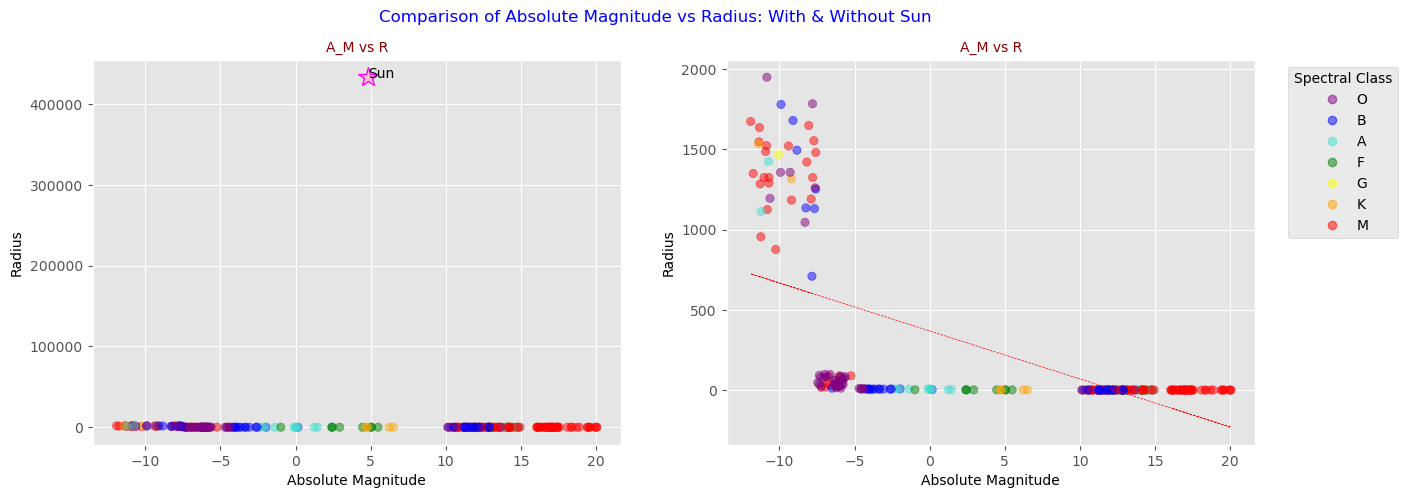

In [2150]:
# absolute magitude vs radius
x = stars_sun['A_M']
y = stars_sun['R']

# sun x and y points
xs = sun['A_M']
ys = sun['R']

# creating empty lists for correlation labels and 
correlation_labels = []
correlation_coefficients = []

# calculating correlation coefficient
correl_xy = y.corr(x)
print('The correlation coefficient is:', correl_xy)

# appending labels and correlation values
correlation_labels.append('Absolute Magnitude vs Radius')
correlation_coefficients.append(correl_xy)

# specifying figure size
plt.figure(figsize=(15, 5))

# color mapping spectral class to scatter plot colors
cmap = stars_sun['Spectral_Class'].map(class_colors)

# plot 1
plt.subplot(1, 2, 1)
plt.scatter(x, y, c=cmap, alpha=0.5)
plt.title('A_M vs R', fontdict=font2)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Radius')
# adding sun data
plt.plot(xs, ys, marker='*', mec='fuchsia', mfc='pink', ls=None, ms=15, label='Sun')
plt.text(xs, ys, 'Sun')

# plot 2
plt.subplot(1, 2, 2)
plt.scatter(x, y, c=cmap, alpha=0.5)
plt.title('A_M vs R', fontdict=font2)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Radius')
# creating equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# adding trendline to plot
plt.plot(x, p(x), color='red', linestyle='--', linewidth = 0.5)

# import for creating legend from scratch
import matplotlib.lines as mlines

# making own legend from scratch - assigning labels and colors
o = mlines.Line2D([], [], color='purple', marker='o', ls='', label='O')
b = mlines.Line2D([], [], color='blue', marker='o', ls='', label='B')
a = mlines.Line2D([], [], color='turquoise', marker='o', ls='', label='A')
f = mlines.Line2D([], [], color='green', marker='o', ls='', label='F')
g = mlines.Line2D([], [], color='yellow', marker='o', ls='', label='G')
k = mlines.Line2D([], [], color='orange', marker='o', ls='', label='K')
m = mlines.Line2D([], [], color='red', marker='o', ls='', label='M')

# adding legend to plot
leg = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', handles=[o, b, a, f, g, k, m], title='Spectral Class')

# setting alpha level to match opacity of scatter plot points
for lh in leg.legend_handles:
    lh.set_alpha(0.5)


plt.suptitle('Comparison of Absolute Magnitude vs Radius: With & Without Sun', fontdict=font1)
plt.show()

    Interpretation:

    On the A_M vs R plot *with the Sun*, the Sun's radius is much larger than any star in the stars dataset and therefore makes it difficult to view an accurate representation of the stars data correlation. The A_M vs R plot *without the Sun*, displays the absolute magnitude and radius of the stars in relation to eachother, so class is better distinguishable in relation to absolute magnitude and radius. A large majority of the stars are found in the >0 to 200 luminosity range with the O class grouping mostly around -7 to -4 Mv range. With an increase in absolute magnitude, the radius remains consistent in most cases, but outliers remain in the 700 - 2,000 radius range and -7 to -13 Mv absolute magnitude range. The Sun's absolute magnitude would group it with stars around -5 Mv where classes F and G reside.

### Temperature vs Radius

The correlation coefficient is: 0.06421597240596891


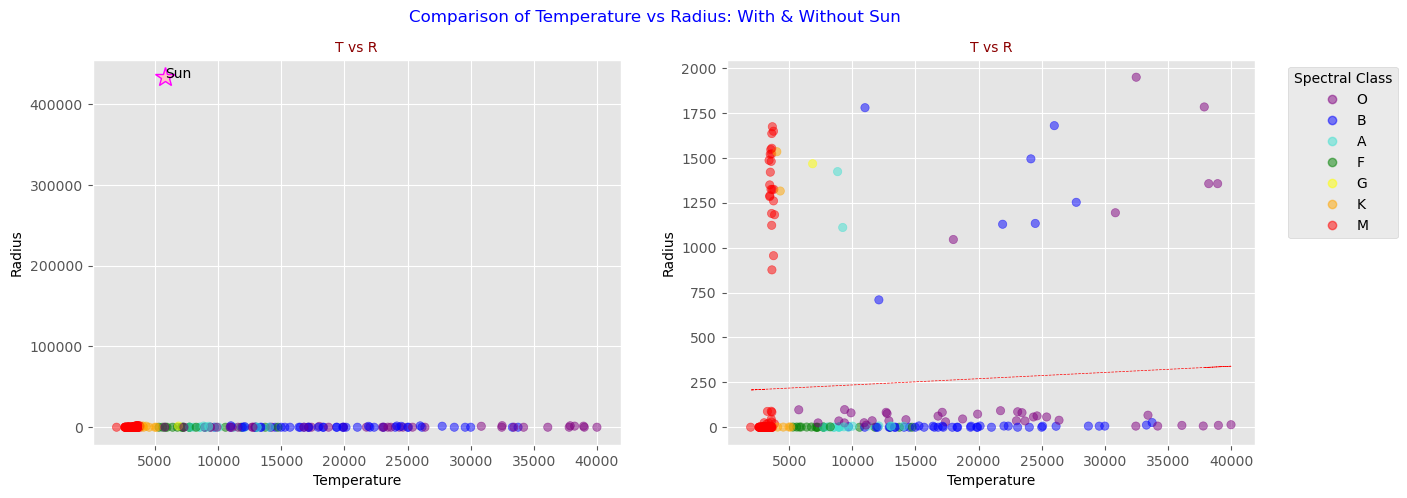

In [2151]:
# temperature vs radius
x = stars_sun['Temperature']
y = stars_sun['R']

# sun x and y points
xs = sun['Temperature']
ys = sun['R']

# calculating correlation coefficient
correl_xy = y.corr(x)
print('The correlation coefficient is:', correl_xy)

# appending labels and correlation values
correlation_labels.append('Temperature vs Radius')
correlation_coefficients.append(correl_xy)

# specifying figure size
plt.figure(figsize=(15, 5))

# plot 1
plt.subplot(1, 2, 1)
plt.scatter(x, y, c=cmap, alpha=0.5)
plt.title('T vs R', fontdict=font2)
plt.xlabel('Temperature')
plt.ylabel('Radius')
# adding sun data
plt.plot(xs, ys, marker='*', mec='fuchsia', mfc='pink', ls=None, ms=15, label='Sun')
plt.text(xs, ys, 'Sun')

# plot 2
plt.subplot(1, 2, 2)
plt.scatter(x, y, c=cmap, alpha=0.5)
plt.title('T vs R', fontdict=font2)
plt.xlabel('Temperature')
plt.ylabel('Radius')
# creating equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# adding trendline to plot
plt.plot(x, p(x), color='red', linestyle='--', linewidth = 0.5)

# adding legend to plot
leg = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', handles=[o, b, a, f, g, k, m], title='Spectral Class')

# setting alpha level to match opacity of scatter plot points
for lh in leg.legend_handles:
    lh.set_alpha(0.5)


plt.suptitle('Comparison of Temperature vs Radius: With & Without Sun', fontdict=font1)
plt.show()

    Interpretation:

    The Sun's large radius in comparison the the other stars is significant enough difference to prevent an accurate plot representation of the data in the star's dataset. Without the Sun plotted, the spectral class follows the pattern of increase in temperature as spectral class moves from M to O class. Radius mostly remains consistent, but with a a small number of stars who's radius is greater than approximately 750. The Sun's temperature follows the class temperature of F and G.

### Absolute Magnitude vs Luminosity

The correlation coefficient is: -0.6926192333999421


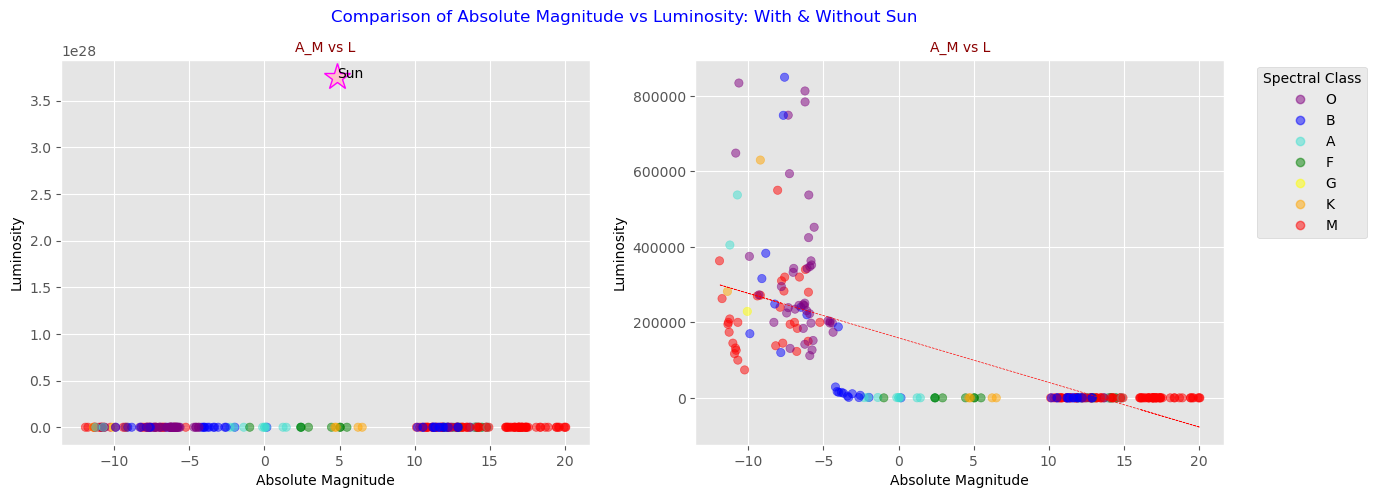

In [2152]:
# absolute magitude vs luminosity
x = stars_sun['A_M']
y = stars_sun['L']

# sun x and y points
xs = sun['A_M']
ys = sun['L']

# calculating correlation coefficient
correl_xy = y.corr(x)

# printing the correlation coefficient
print('The correlation coefficient is:', correl_xy)

# appending labels and correlation values
correlation_labels.append('Absolute Magnitude vs Luminosity')
correlation_coefficients.append(correl_xy)

# specifying figure size
plt.figure(figsize=(15, 5))

# plot 1
plt.subplot(1, 2, 1)
plt.scatter(x, y, c=cmap, alpha=0.5)
plt.title('A_M vs L', fontdict=font2)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Luminosity')
# adding sun data
plt.plot(xs, ys, marker='*', mec='fuchsia', mfc='pink', ls=None, ms=20, label='Sun')
plt.text(xs, ys, 'Sun')

# plot 2
plt.subplot(1, 2, 2)
plt.scatter(x, y, c=cmap, alpha=0.5)
plt.title('A_M vs L', fontdict=font2)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Luminosity')

# creating equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# adding trendline to plot
plt.plot(x, p(x), color='red', linestyle='--', linewidth = 0.5)

# adding legend to plot
leg = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', handles=[o, b, a, f, g, k, m], title='Spectral Class')

# setting alpha level to match opacity of scatter plot points
for lh in leg.legend_handles:
    lh.set_alpha(0.5)


plt.suptitle('Comparison of Absolute Magnitude vs Luminosity: With & Without Sun', fontdict=font1)
plt.show()

    Interpretation:

    The Sun's absolute magnitude falls within range of magnitudes of classes F and G, but the Sun's large luminosity is much greater than those of the other stars.

### Radius vs Luminosity

The correlation coefficient is: 0.5265157243480013


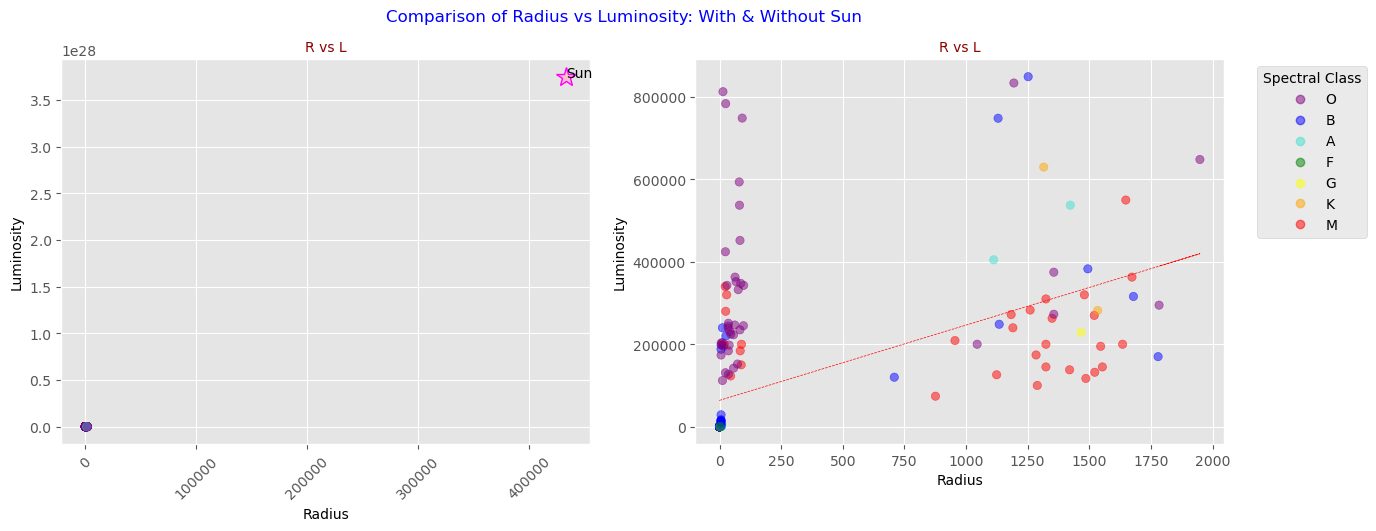

In [2153]:
# radius vs luminosity
x = stars_sun['R']
y = stars_sun['L']

# sun x and y points
xs = sun['R']
ys = sun['L']

# calculating correlation coefficient
correl_xy = y.corr(x)
print('The correlation coefficient is:', correl_xy)

# appending labels and correlation values
correlation_labels.append('Radius vs Luminosity')
correlation_coefficients.append(correl_xy)

# specifying figure size
plt.figure(figsize=(15, 5))

# plot 1
plt.subplot(1, 2, 1)
plt.scatter(x, y, c=cmap, alpha=0.5)
plt.title('R vs L', fontdict=font2)
plt.xlabel('Radius')
plt.xticks(rotation=45)
plt.ylabel('Luminosity')
# adding sun data
plt.plot(xs, ys, marker='*', mec='fuchsia', mfc='pink', ls=None, ms=15, label='Sun')
plt.text(xs, ys, 'Sun')

# plot 2
plt.subplot(1, 2, 2)
plt.scatter(x, y, c=cmap, alpha=0.5)
plt.title('R vs L', fontdict=font2)
plt.xlabel('Radius')
plt.ylabel('Luminosity')

# creating equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# add trendline to plot
plt.plot(x, p(x), color='red', linestyle='--', linewidth = 0.5)

# adding legend to plot
leg = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', handles=[o, b, a, f, g, k, m], title='Spectral Class')

# setting alpha level to match opacity of scatter plot points
for lh in leg.legend_handles:
    lh.set_alpha(0.5)

plt.suptitle('Comparison of Radius vs Luminosity: With & Without Sun', fontdict=font1)
plt.show()

    Interpretation:

    The Sun is much larger in both radius and temperature, causing the data in the stars dataset to be grouped just above the (0,0) coordinate. The luminosity of the O class varies, but radius remains consistent. The M class increases in luminosity as radius increases, following the projected trendline, with a correlation coefficient of 0.527. In ranges of radius 700 - 2,00 there is a large variation in both radius and luminosity. Many of the B class stars form a grouping just greater than the (0,0) coordinate.

### Temperature vs Luminosity

The correlation coefficient is: 0.3934040755097611


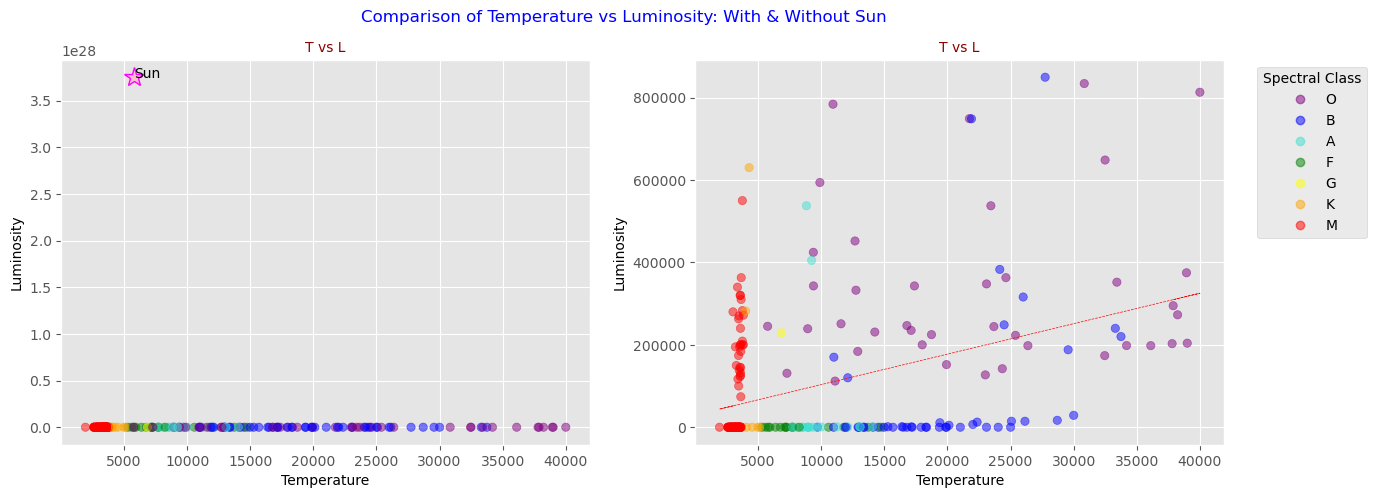

In [2154]:
# temperature vs luminosity
x = stars_sun['Temperature']
y = stars_sun['L']

# sun x and y points
xs = sun['Temperature']
ys = sun['L']

# calculating correlation coefficient
correl_xy = y.corr(x)
print('The correlation coefficient is:', correl_xy)

# appending labels and correlation values
correlation_labels.append('Temperature vs Luminosity')
correlation_coefficients.append(correl_xy)

# specifying figure size
plt.figure(figsize=(15, 5))

# plot 1
plt.subplot(1, 2, 1)
plt.scatter(x, y, c=cmap, alpha=0.5)
plt.title('T vs L', fontdict=font2)
plt.xlabel('Temperature')
plt.ylabel('Luminosity')
# adding sun data
plt.plot(xs, ys, marker='*', mec='fuchsia', mfc='pink', ls=None, ms=15, label='Sun')
plt.text(xs, ys, 'Sun')

# plot 2
plt.subplot(1, 2, 2)
plt.scatter(x, y, c=cmap, alpha=0.5)
plt.title('T vs L', fontdict=font2)
plt.xlabel('Temperature')
plt.ylabel('Luminosity')

# creating equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# adding trendline to plot
plt.plot(x, p(x), color='red', linestyle='--', linewidth = 0.5)

# adding legend to plot
leg = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', handles=[o, b, a, f, g, k, m], title='Spectral Class')

# setting alpha level to match opacity of scatter plot points
for lh in leg.legend_handles:
    lh.set_alpha(0.5)


plt.suptitle('Comparison of Temperature vs Luminosity: With & Without Sun', fontdict=font1)
plt.show()

    Interpretation:

    The sun's large luminosity compared to the other stars allows us to see the grouping along roughly the x axis, showing the established pattern of temperature. A the temperature increases, the classes follow the M --> O class, with M having the lowest temperature and O having the greatest temperature. There is a large variation in the B and O classes' luminocity. The Sun's temperature places it in the F and G class temperature ranges.

### Temperature vs Absolute Magnitude

The correlation coefficient is: -0.4202605423694728


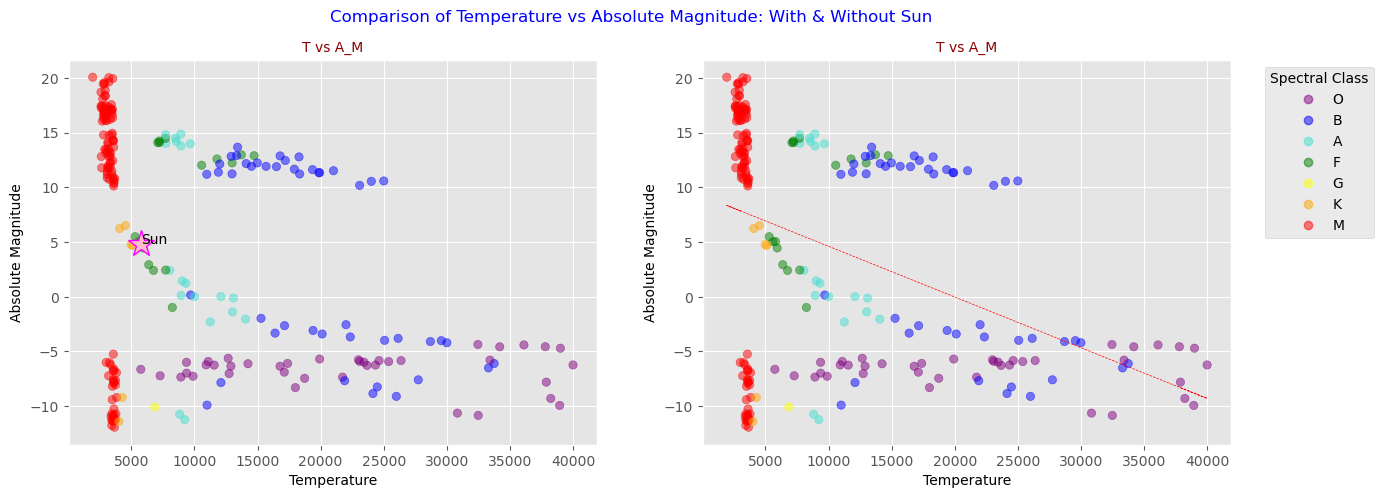

In [2155]:
# absolute magitude vs temperature
x = stars_sun['Temperature']
y = stars_sun['A_M']

# sun x and y points
xs = sun['Temperature']
ys = sun['A_M']

# calculating correlation coefficient
correl_xy = y.corr(x)
print('The correlation coefficient is:', correl_xy)

# appending labels and correlation values
correlation_labels.append('Temperature vs Absolute Magnitude')
correlation_coefficients.append(correl_xy)

# specifying figure size
plt.figure(figsize=(15, 5))

# plot 1
plt.subplot(1, 2, 1)
plt.scatter(x, y, c=cmap, alpha=0.5)
plt.title('T vs A_M', fontdict=font2)
plt.xlabel('Temperature')
plt.ylabel('Absolute Magnitude')
# adding sun data
plt.plot(xs, ys, marker='*', mec='fuchsia', mfc='pink', ls=None, ms=20, label='Sun')
plt.text(xs, ys, 'Sun')

# plot 2
plt.subplot(1, 2, 2)
plt.scatter(x, y, c=cmap, alpha=0.5)
plt.title('T vs A_M', fontdict=font2)
plt.xlabel('Temperature')
plt.ylabel('Absolute Magnitude')

# creating equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# adding trendline to plot
plt.plot(x, p(x), color='red', linestyle='--', linewidth = 0.5)

# adding legend to plot
leg = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', handles=[o, b, a, f, g, k, m], title='Spectral Class')

# setting alpha level to match opacity of scatter plot points
for lh in leg.legend_handles:
    lh.set_alpha(0.5)


plt.suptitle('Comparison of Temperature vs Absolute Magnitude: With & Without Sun', fontdict=font1)
plt.show()

    Interpretation:

    The temperature pattern is consisted on the temperature vs absolute magnitude plot. The Sun's temperature and absolute magnitude are comparable on this plot. The temperature and magnitude of the Sun is grouped around F and G class stars. A closer look at these similar stars is shown below.

## Comparing Rows Similar to the Sun in Temperature and Absolute Magnitude

In [2156]:
# getting rows where abs mag and temp are similar to sun's abs and temp
#   3 <= stars_sun A_M <= 7
#   3000 <= stars_sun Temperature <= 7000

temp_absmag = stars_sun[((stars_sun['A_M'])<=7.0) & (stars_sun['A_M']>=3.0) & ((stars_sun['Temperature'])<=7000.0) & (stars_sun['Temperature']>=3000.0)]
temp_absmag

,Temperature,L,R,A_M,Spectral_Class,Color
34,5800,0.810,0.900,5.050,F,Yellow-White
38,5936,1.357,1.106,4.460,F,Yellow-White
39,5587,0.819,0.990,5.030,F,Yellow-White
90,5300,0.590,0.910,5.490,F,Yellow-White
91,4526,0.153,0.865,6.506,K,Yellow
92,4077,0.085,0.795,6.228,K,Yellow
93,4980,0.357,1.130,4.780,K,Yellow
96,5112,0.630,0.876,4.680,K,Orange-Red


The correlation coefficient is: -0.7728923708733777


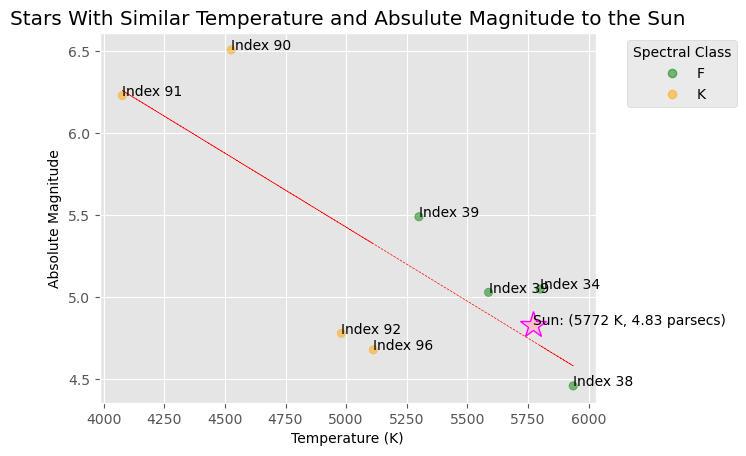

In [2157]:
# plotting stars with temp and abs mag conditions similar to the Sun's
x = temp_absmag['Temperature'] 
y = temp_absmag['A_M']

# calculating correlation coefficient
correl_xy = y.corr(x)
print('The correlation coefficient is:', correl_xy)

# appending labels and correlation values
correlation_labels.append('Stars With Similar Temperature and Absulute Magnitude to the Sun')
correlation_coefficients.append(correl_xy)

s_cmap = temp_absmag['Spectral_Class'].map(class_colors)

# creating the scatter plot
plt.scatter(x, y, c=s_cmap, alpha=0.5)
plt.title('Stars With Similar Temperature and Absulute Magnitude to the Sun')
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute Magnitude')

#add text to certain points
plt.text(5800, 5.050, 'Index 34')  # point 1; Index 34
plt.text(5936, 4.460, 'Index 38')  # point 2; Index 38
plt.text(5587, 5.030, 'Index 39')  # point 3; Index 39
plt.text(5300, 5.490, 'Index 39')  # point 4; Index 39
plt.text(4526, 6.506, 'Index 90')  # point 5; Index 90
plt.text(4077, 6.228, 'Index 91')  # point 6; Index 91
plt.text(4980, 4.780, 'Index 92')  # point 7; Index 92
plt.text(5112, 4.680, 'Index 96')  # point 8; Index 96

# adding sun data
plt.plot(xs, ys, marker='*', mec='fuchsia', mfc='pink', ls=None, ms=20, label='Sun')
plt.text(5772, 4.83, 'Sun: (5772 K, 4.83 parsecs)')

# adding legend to plot
leg = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', handles=[f, k], title='Spectral Class')

# creating equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# adding trendline to plot
plt.plot(x, p(x), color='red', linestyle='--', linewidth = 0.5)

# setting alpha level to match opacity of scatter plot points
for lh in leg.legend_handles:
    lh.set_alpha(0.5)

    Interpretation:

    Similar stars to the Sun are in classes F and K. The Sun is most similar to stars at index 34, 39, and 38, which are all of spectral class F. The spectral class of the Sun is class M. The plot has a correlation coefficient of 0.77, indicating a strong negative relationship between temperature and absolute magnitude. This is much larger than the temperature vs absolute magnitude plot showing all of the stars in the stars dataset.

## Metrics

#### Spectral Class Statistics

In [2158]:
# getting percentages for each class
total = sum(class_count)
percent_O = count_O / total * 100
percent_B = count_B / total * 100
percent_A = count_A / total * 100
percent_F = count_F / total * 100
percent_G = count_G / total * 100
percent_K = count_K / total * 100
percent_M = count_M / total * 100

# list of spectral class percentages of total df stars
percentages = [percent_O, percent_B, percent_A, percent_F, percent_G, percent_K, percent_M] 

class_percentages = dict(zip(class_order, percentages))
class_percentages

{'O': 16.666666666666664,
 'B': 19.166666666666668,
 'A': 7.916666666666666,
 'F': 7.083333333333333,
 'G': 0.4166666666666667,
 'K': 2.5,
 'M': 46.25}

    Interpretation:

    The most common class by far are stars of M class, making up 46.25% of the dataset. The least common class is of class G at only 0.42% of the dataset.

#### Temperature Statistics

In [2159]:
# calculating mean for temperature column
temp_avg = stars_sun['Temperature'].mean()
print('Average temperature is:', temp_avg)

# calculating median for temperature column
temp_med = stars_sun['Temperature'].median()
print('Temperature median is:', temp_med)

Average temperature is: 10497.4625
Temperature median is: 5776.0


    Interpretation:

    The average temperature of the stars dataset is 10,497K, which is in range of the B class. Although B class is not the most common, there is a significantly large range of temperatures across the dataset. The median of star temperature, 5776K, is within the G class range and similar to the Sun's temperature of 5772K. The median is much closer is temperature to the most common class, M, than the mean temperature is.

#### Stars Most Similar to the Sun in Temperature and Absolute Magnitude

In [2160]:
# printing sun data
sun

{'Temperature': 5772,
 'L': 3.75e+28,
 'R': 433000.0,
 'A_M': 4.83,
 'Spectral_Class': 'G',
 'Color': 'Yellow'}

In [2161]:
# printing index of points similar to the sun in temperature and absolute magnitude
stars_similar_to_sun = temp_absmag.loc[[34, 39, 38]]
stars_similar_to_sun

,Temperature,L,R,A_M,Spectral_Class,Color
34,5800,0.810,0.900,5.05,F,Yellow-White
39,5587,0.819,0.990,5.03,F,Yellow-White
38,5936,1.357,1.106,4.46,F,Yellow-White


    Interpretation:

    The Sun is most similar to the stars at rows 34, 39, and 38 in both temperature and absolute magnitude, but are largely different in spectral class and radius, and even more significantly different in luminosity. The F class stars above and all yellow-white in color, which is similar to the Sun's yellow color.

#### Skew and Kurtosis of Temperature

In [2162]:
from scipy.stats import skew
from scipy.stats import kurtosis

# calculating skewedness of temperature column
skew = skew(stars_sun['Temperature'], axis=0, bias=True)
print('Temperature skewedness is:', skew)

# calculating kurtosis of temperature column
kurtosis = kurtosis(stars_sun['Temperature'], axis=0, bias=True)
print('Temperature kurtosis is:', kurtosis)

Temperature skewedness is: 1.3132941596030199
Temperature kurtosis is: 0.8342840793595045


    Interpretation:

    An important measure in statistical analyses is to determine the location and variability of a dataset. This can be determined by calculating skew and kurtosis of a dataset feature. Skew is a commonly used measure in descriptive statistics and allows for the characterization of asymmety of data distripution. Normaly distributed data is characterized by a bell curve. A positive skew indicates a right-tailed distribution, like that of star temperature with a skew of 1.31, whereas a negative skew suggests a left-tailed distribution. The temperature scew of 1.31 falls in the range of >1, indicating a highly skewed distribution. Kurtosis is the measure of whether this distribution is heavily-tailed or light-tailed in comparison to a normal distribution. A kurtosis between -2 and +2 (the temperature kurtosis of 0.83 falls within this range) is considered an acceptable value to prove normal univariate distribution. The histogram of temperature provides an effective graphical technique for visualizing the skew and kurtosis.

#### Correlation Coefficients

In [2163]:
# creating dict from correlation_labels and correlation_coefficients
correlation = pd.DataFrame(list(zip(correlation_labels, correlation_coefficients)), columns=['Plot', 'Correlation Coefficient'])

# sorting df by absolute value of correl coef
correlation.sort_values(by='Correlation Coefficient', key=abs, ascending=False, inplace=True)
correlation

,Plot,Correlation Coefficient
6,Stars With Similar Temperature and Absulute Ma...,-0.772892
2,Absolute Magnitude vs Luminosity,-0.692619
0,Absolute Magnitude vs Radius,-0.608728
3,Radius vs Luminosity,0.526516
5,Temperature vs Absolute Magnitude,-0.420261
4,Temperature vs Luminosity,0.393404
1,Temperature vs Radius,0.064216


    Interpretation:

    The largest correlation coefficient is produced in the "Stars With Similar Temperature and Absolute Magnitude to the Sun" plot, displaying the stars most similar to the Sun in temperature and absolute magnitude. These similar stars and Sun data follow the trendline of temperature vs absolute magnitude closely. A negative correlation coefficient represents an inverse relationship between variables; for example, the correlation coefficient of -0.77 for the temperature vs absolute magnitude plot with stars similar to the Sun suggests that as temperature increases, absolute magnitude decreases. A coefficient greater than 0.7 is considered to indicate a strong relationship between variables. The temperature vs absolute magnitude plot with stars similar to the sun has a strong inverse relationship between temperature and absolute magnitude. The absolute magnitude vs luminosity plot has a correlation coefficient of -0.69 which also indicates a strong inverse relationship between variables. A coefficient of 0.53 for the radius vs luminosity plot means that there is a moderate amount of correlation between radius and luminosity. The smallest coefficient of 0.06 for the temperature vs radius plot suggests an extremely weak relationship between temperature and radius.

## Plotting the HR Diagram

Text(0.5, 0, 'log(Temperature)')

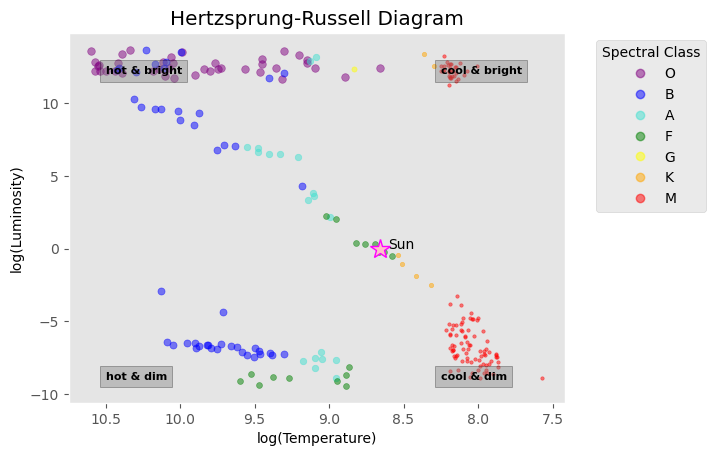

In [2165]:
# specifying spectral class variables
O = stars[stars["Spectral_Class"] == 'O']
B = stars[stars["Spectral_Class"] == 'B']
A = stars[stars["Spectral_Class"] == 'A']
F = stars[stars["Spectral_Class"] == 'F']
G = stars[stars["Spectral_Class"] == 'G']
K = stars[stars["Spectral_Class"] == 'K']
M = stars[stars["Spectral_Class"] == 'M']


# plotting the HR diagram

# specifying plot type/style
plt.style.use('ggplot')
plt.grid()

# plotting O spectral class data on scatter plot
plt.scatter(np.log(O['Temperature']), np.log(O['L']), s=30, label = 'O', color='purple', alpha=0.5)
# plotting B spectral class data on scatter plot
plt.scatter(np.log(B['Temperature']), np.log(B['L']), s=26, label = 'B', color='blue', alpha=0.5)
# plotting A spectral class data on scatter plot
plt.scatter(np.log(A['Temperature']), np.log(A['L']), s=22, label = 'A', color='turquoise', alpha=0.5)
# plotting F spectral class data on scatter plot
plt.scatter(np.log(F['Temperature']), np.log(F['L']), s=18, label = 'F', color='green', alpha=0.5)
# plotting G spectral class data on scatter plot
plt.scatter(np.log(G['Temperature']), np.log(G['L']), s=14, label = 'G', color='yellow', alpha=0.5)
# plotting K spectral class data on scatter plot
plt.scatter(np.log(K['Temperature']), np.log(K['L']), s=10, label = 'K', color='orange', alpha=0.5)
# plotting M spectral class data on scatter plot
plt.scatter(np.log(M['Temperature']), np.log(M['L']), s=6, label = 'M', color='red', alpha=0.5)

# inverting x axis
plt.gca().invert_xaxis()

# adding legend to plot
leg = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', handles=[o, b, a, f, g, k, m], title='Spectral Class')

# setting alpha level to match opacity of scatter plot points
for lh in leg.legend_handles:
    lh.set_alpha(0.5)

# sun x and y values
hr_xsun = np.log(5772)
hr_ysun = np.log(1)

# adding sun data
plt.plot(hr_xsun, hr_ysun, marker='*', mec='fuchsia', mfc='pink', ls=None, ms=15)
plt.text(hr_xsun-0.06, hr_ysun, 'Sun')

# plotting quadrant labels
plt.text(10.5, 12, 'hot & bright', fontdict=dict(fontsize=8, fontweight='bold'), bbox=dict(facecolor='gray', alpha=0.4, edgecolor='black'))
plt.text(8.25, 12, 'cool & bright', fontdict=dict(fontsize=8, fontweight='bold'), bbox=dict(facecolor='gray', alpha=0.4, edgecolor='black'))
plt.text(10.5, -9, 'hot & dim', fontdict=dict(fontsize=8, fontweight='bold'), bbox=dict(facecolor='gray', alpha=0.4, edgecolor='black'))
plt.text(8.25, -9, 'cool & dim', fontdict=dict(fontsize=8, fontweight='bold'), bbox=dict(facecolor='gray', alpha=0.4, edgecolor='black'))


plt.title('Hertzsprung-Russell Diagram')
plt.ylabel('log(Luminosity)')
plt.xlabel('log(Temperature)')

*Note: The x axis, log(temperature), is in decsending order*

    Interpretation:

    On the HR diagram, the sun falls in both the temperature and luminocity ranges of the F and G class, which was also seen in the 'Stars With Similar Temperature and Absulute Magnitude to the Sun' plot. The diagonal band in the middle of the plot is known as the "main sequence" and includes the Sun. The main sequence makes up a large majority of the stars we see in the sky as well as the majority of our dataset and follow a strong negative correlation relationship. 
    
    The upper left quadrant includes main sequence stars that are low in temperature and high in luminosity and consist of stars in classes O and B. These stars are hot and bright compared to the main sequence.
    
    The supergiants and giants are found in the upper right quadrant of the plot, largely made up of M class stars that are low in temperature and high in luminosity. These stars are cool and bright.
    
    The white dwarfs are located in the lower left quadrant, consisting of classes B, A, and F that are low in both temperature and luminosity. These stars are hot and dim.

    The lower right quadrant consists of main sequence stars that are low in both temperature and luminosity making them cool and dim. This quadrant is made up of a large majority of M and some K class stars.

---
## Results/Conclusion

Key Takeaways:
- The most common stars in the stars dataset are of spectral class M, which are part of the main sequence in star classification. The main sequence also makes up a large majority of stars seen in the sky.
- The Sun is most similar in temperature and absolute magnitude to stars in classes F and K. The Sun is categorized as spectral class G. G class makes up less than 0.5% of the star data, with only one star in the stars dataset being of G class. G class has a temperature range of 5,200 - 6,000K and falls between the F and K class temperature ranges. The only G class point is out of the normal luminosity range (0.6 - 1.5 solar luminosity) for the class. If there were more stars in the dataset representing G class, then the Sun would fall in this range.
    - The stars most similar to the Sun and are possibly able to support life on nearby planets are located at rows 34 (5,800 K, 5.05 parsecs), 39 (5587K, 5.03 parsecs), and 38 (5936K, 4.46 parsec), but they are very different from the Sun in terms of radius.
- The HR diagram created for the stars dataset is representative of the official Hertzsprung Russel diagram created by Ejnar Hertzsprung and Henry Russel in 1910.
